<a href="https://colab.research.google.com/github/RumeysaCeylan/ImageClassification/blob/main/vgg19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm

import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb



from keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [34]:
from google.colab import drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')



valid_set = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/archive/validation',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 128)
     

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive/Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 4030 images belonging to 4 classes.
Found 1103 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


100%|██████████| 5/5 [00:14<00:00,  2.93s/it]


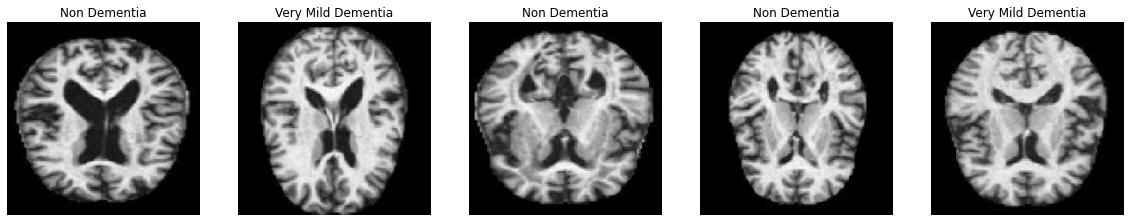

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(training_set))
    rand2 = np.random.randint(100)
    ax[i].imshow(training_set[rand1][0][rand2])
    ax[i].axis('off')
    a = training_set[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [37]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [38]:
for layer in vgg.layers:
  layer.trainable = False

In [39]:
folders=glob("/content/drive/MyDrive/archive/Dataset/*")
folders

['/content/drive/MyDrive/archive/Dataset/Non_Demented',
 '/content/drive/MyDrive/archive/Dataset/Very_Mild_Demented',
 '/content/drive/MyDrive/archive/Dataset/Mild_Demented',
 '/content/drive/MyDrive/archive/Dataset/Moderate_Demented']

In [40]:
x = Flatten()(vgg.output)

In [41]:
prediction = Dense(len(folders), activation='softmax')(x)
 
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
import tensorflow 

OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)


In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = './content/drive/MyDrive/Colab Notebooks/best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [45]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [46]:
from keras.preprocessing.image import ImageDataGenerator

In [47]:
# fiting the model
 
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=50,
  callbacks = callback_list,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)


Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 1.6556 - accuracy: 0.4672

32/32 [==============================] - 59s 2s/step - loss: 1.6556 - accuracy: 0.4672 - val_loss: 1.1877 - val_accuracy: 0.4297
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.9087 - accuracy: 0.5809

32/32 [==============================] - 58s 2s/step - loss: 0.9087 - accuracy: 0.5809 - val_loss: 1.4952 - val_accuracy: 0.4062
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.8078 - accuracy: 0.6315

32/32 [==============================] - 57s 2s/step - loss: 0.8078 - accuracy: 0.6315 - val_loss: 1.1883 - val_accuracy: 0.4325
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.7599 - accuracy: 0.6538

32/32 [==============================] - 57s 2s/step - loss: 0.7599 - accuracy: 0.6538 - val_loss: 1.3077 - val_accuracy: 0.4207
Epoch 5/50
32/32 [==============================] - ETA: 0s - loss: 0.7376 - accuracy: 0.6665

32/32 [==============================] - 57s 2s/step - loss: 0.7376 - accuracy: 0.6665 - val_loss: 1.3473 - val_accuracy: 0.4261
Epoch 6/50
32/32 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.6935

32/32 [==============================] - 58s 2s/step - loss: 0.6960 - accuracy: 0.6935 - val_loss: 1.2052 - val_accuracy: 0.4451
Epoch 7/50
32/32 [==============================] - ETA: 0s - loss: 0.6663 - accuracy: 0.7132

32/32 [==============================] - 57s 2s/step - loss: 0.6663 - accuracy: 0.7132 - val_loss: 1.4086 - val_accuracy: 0.4243
Epoch 8/50
32/32 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.7146

32/32 [==============================] - 57s 2s/step - loss: 0.6580 - accuracy: 0.7146 - val_loss: 1.2876 - val_accuracy: 0.4433
Epoch 9/50
32/32 [==============================] - ETA: 0s - loss: 0.6274 - accuracy: 0.7313

32/32 [==============================] - 57s 2s/step - loss: 0.6274 - accuracy: 0.7313 - val_loss: 1.2657 - val_accuracy: 0.4578
Epoch 10/50
32/32 [==============================] - ETA: 0s - loss: 0.6306 - accuracy: 0.7223

32/32 [==============================] - 57s 2s/step - loss: 0.6306 - accuracy: 0.7223 - val_loss: 1.2415 - val_accuracy: 0.4615
Epoch 11/50
32/32 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.7452

32/32 [==============================] - 57s 2s/step - loss: 0.6095 - accuracy: 0.7452 - val_loss: 1.3210 - val_accuracy: 0.4624
Epoch 12/50
32/32 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.7506

32/32 [==============================] - 57s 2s/step - loss: 0.5887 - accuracy: 0.7506 - val_loss: 1.4043 - val_accuracy: 0.4524
Epoch 13/50
32/32 [==============================] - ETA: 0s - loss: 0.6148 - accuracy: 0.7407

32/32 [==============================] - 58s 2s/step - loss: 0.6148 - accuracy: 0.7407 - val_loss: 1.6461 - val_accuracy: 0.4388
Epoch 14/50
32/32 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.7583

32/32 [==============================] - 57s 2s/step - loss: 0.5692 - accuracy: 0.7583 - val_loss: 1.2384 - val_accuracy: 0.4878
Epoch 15/50
32/32 [==============================] - ETA: 0s - loss: 0.5456 - accuracy: 0.7730

32/32 [==============================] - 57s 2s/step - loss: 0.5456 - accuracy: 0.7730 - val_loss: 1.3796 - val_accuracy: 0.4651
Epoch 16/50
32/32 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.7764

32/32 [==============================] - 62s 2s/step - loss: 0.5353 - accuracy: 0.7764 - val_loss: 1.5637 - val_accuracy: 0.4461
Epoch 17/50
32/32 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.7868

32/32 [==============================] - 58s 2s/step - loss: 0.5188 - accuracy: 0.7868 - val_loss: 1.6172 - val_accuracy: 0.4424
Epoch 18/50
32/32 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.7913

32/32 [==============================] - 58s 2s/step - loss: 0.5041 - accuracy: 0.7913 - val_loss: 1.2901 - val_accuracy: 0.4841
Epoch 19/50
32/32 [==============================] - ETA: 0s - loss: 0.4823 - accuracy: 0.8132

32/32 [==============================] - 57s 2s/step - loss: 0.4823 - accuracy: 0.8132 - val_loss: 1.7172 - val_accuracy: 0.4325
Epoch 20/50
32/32 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.7960

32/32 [==============================] - 57s 2s/step - loss: 0.4985 - accuracy: 0.7960 - val_loss: 1.7172 - val_accuracy: 0.4442
Epoch 21/50
32/32 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7898

32/32 [==============================] - 57s 2s/step - loss: 0.5019 - accuracy: 0.7898 - val_loss: 1.6993 - val_accuracy: 0.4424
Epoch 22/50
32/32 [==============================] - ETA: 0s - loss: 0.4904 - accuracy: 0.8010

32/32 [==============================] - 57s 2s/step - loss: 0.4904 - accuracy: 0.8010 - val_loss: 1.4616 - val_accuracy: 0.4805
Epoch 23/50
32/32 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.8129

32/32 [==============================] - 57s 2s/step - loss: 0.4678 - accuracy: 0.8129 - val_loss: 1.9195 - val_accuracy: 0.4388
Epoch 24/50
32/32 [==============================] - ETA: 0s - loss: 0.4772 - accuracy: 0.8010

32/32 [==============================] - 58s 2s/step - loss: 0.4772 - accuracy: 0.8010 - val_loss: 1.9430 - val_accuracy: 0.4343
Epoch 25/50
32/32 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.8293

32/32 [==============================] - 57s 2s/step - loss: 0.4457 - accuracy: 0.8293 - val_loss: 1.4868 - val_accuracy: 0.4714
Epoch 26/50
32/32 [==============================] - ETA: 0s - loss: 0.4341 - accuracy: 0.8300

32/32 [==============================] - 58s 2s/step - loss: 0.4341 - accuracy: 0.8300 - val_loss: 1.5667 - val_accuracy: 0.4569
Epoch 27/50
32/32 [==============================] - ETA: 0s - loss: 0.4147 - accuracy: 0.8442

32/32 [==============================] - 57s 2s/step - loss: 0.4147 - accuracy: 0.8442 - val_loss: 1.5105 - val_accuracy: 0.4687
Epoch 28/50
32/32 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.8211

32/32 [==============================] - 58s 2s/step - loss: 0.4466 - accuracy: 0.8211 - val_loss: 1.4315 - val_accuracy: 0.4905
Epoch 29/50
32/32 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.8295

32/32 [==============================] - 57s 2s/step - loss: 0.4268 - accuracy: 0.8295 - val_loss: 1.3673 - val_accuracy: 0.4977
Epoch 30/50
32/32 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.8268

32/32 [==============================] - 57s 2s/step - loss: 0.4406 - accuracy: 0.8268 - val_loss: 1.7570 - val_accuracy: 0.4615
Epoch 31/50
32/32 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8288

32/32 [==============================] - 57s 2s/step - loss: 0.4169 - accuracy: 0.8288 - val_loss: 1.6314 - val_accuracy: 0.4678
Epoch 32/50
32/32 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.8285

32/32 [==============================] - 58s 2s/step - loss: 0.4255 - accuracy: 0.8285 - val_loss: 1.3644 - val_accuracy: 0.5014
Epoch 33/50
32/32 [==============================] - ETA: 0s - loss: 0.4000 - accuracy: 0.8533

32/32 [==============================] - 57s 2s/step - loss: 0.4000 - accuracy: 0.8533 - val_loss: 1.4407 - val_accuracy: 0.4959
Epoch 34/50
32/32 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.8625

32/32 [==============================] - 57s 2s/step - loss: 0.3874 - accuracy: 0.8625 - val_loss: 1.8071 - val_accuracy: 0.4642
Epoch 35/50
32/32 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.8380

32/32 [==============================] - 56s 2s/step - loss: 0.4120 - accuracy: 0.8380 - val_loss: 1.8149 - val_accuracy: 0.4560
Epoch 36/50
32/32 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.8340

32/32 [==============================] - 58s 2s/step - loss: 0.4180 - accuracy: 0.8340 - val_loss: 1.7128 - val_accuracy: 0.4669
Epoch 37/50
32/32 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.8474

32/32 [==============================] - 57s 2s/step - loss: 0.3920 - accuracy: 0.8474 - val_loss: 1.8604 - val_accuracy: 0.4515
Epoch 38/50
32/32 [==============================] - ETA: 0s - loss: 0.4151 - accuracy: 0.8203

32/32 [==============================] - 57s 2s/step - loss: 0.4151 - accuracy: 0.8203 - val_loss: 1.4595 - val_accuracy: 0.5095
Epoch 39/50
32/32 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8615

32/32 [==============================] - 56s 2s/step - loss: 0.3688 - accuracy: 0.8615 - val_loss: 1.7027 - val_accuracy: 0.4615
Epoch 40/50
32/32 [==============================] - ETA: 0s - loss: 0.3601 - accuracy: 0.8625

32/32 [==============================] - 58s 2s/step - loss: 0.3601 - accuracy: 0.8625 - val_loss: 1.7269 - val_accuracy: 0.4723
Epoch 41/50
32/32 [==============================] - ETA: 0s - loss: 0.3628 - accuracy: 0.8672

32/32 [==============================] - 56s 2s/step - loss: 0.3628 - accuracy: 0.8672 - val_loss: 1.7582 - val_accuracy: 0.4696
Epoch 42/50
32/32 [==============================] - ETA: 0s - loss: 0.3743 - accuracy: 0.8581

32/32 [==============================] - 57s 2s/step - loss: 0.3743 - accuracy: 0.8581 - val_loss: 1.9467 - val_accuracy: 0.4669
Epoch 43/50
32/32 [==============================] - ETA: 0s - loss: 0.3581 - accuracy: 0.8670

32/32 [==============================] - 57s 2s/step - loss: 0.3581 - accuracy: 0.8670 - val_loss: 1.5292 - val_accuracy: 0.4932
Epoch 44/50
32/32 [==============================] - ETA: 0s - loss: 0.3515 - accuracy: 0.8707

32/32 [==============================] - 58s 2s/step - loss: 0.3515 - accuracy: 0.8707 - val_loss: 1.8450 - val_accuracy: 0.4615
Epoch 45/50
32/32 [==============================] - ETA: 0s - loss: 0.3377 - accuracy: 0.8804

32/32 [==============================] - 57s 2s/step - loss: 0.3377 - accuracy: 0.8804 - val_loss: 1.6100 - val_accuracy: 0.4832
Epoch 46/50
32/32 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.8744

32/32 [==============================] - 57s 2s/step - loss: 0.3369 - accuracy: 0.8744 - val_loss: 1.8376 - val_accuracy: 0.4669
Epoch 47/50
32/32 [==============================] - ETA: 0s - loss: 0.3435 - accuracy: 0.8702

32/32 [==============================] - 57s 2s/step - loss: 0.3435 - accuracy: 0.8702 - val_loss: 1.5805 - val_accuracy: 0.5086
Epoch 48/50
32/32 [==============================] - ETA: 0s - loss: 0.3564 - accuracy: 0.8640

32/32 [==============================] - 58s 2s/step - loss: 0.3564 - accuracy: 0.8640 - val_loss: 1.8344 - val_accuracy: 0.4615
Epoch 49/50
32/32 [==============================] - ETA: 0s - loss: 0.3345 - accuracy: 0.8774

32/32 [==============================] - 57s 2s/step - loss: 0.3345 - accuracy: 0.8774 - val_loss: 1.8789 - val_accuracy: 0.4651
Epoch 50/50
32/32 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8935

32/32 [==============================] - 57s 2s/step - loss: 0.3176 - accuracy: 0.8935 - val_loss: 2.0735 - val_accuracy: 0.4506


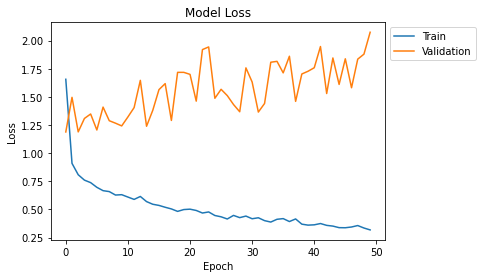

In [48]:

# Summarize history for loss

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [49]:

# Summarize history for loss

plt.plot(r.history['auc'])
plt.plot(r.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

KeyError: ignored

In [50]:
model.evaluate(test_set)

11/11 [==============================] - 8s 687ms/step - loss: 1.0985 - accuracy: 0.6214


[1.0985097885131836, 0.6213895678520203]

1/1 [==============================] - 0s 154ms/step
99.92 % chances are there that the image is Non_Demented


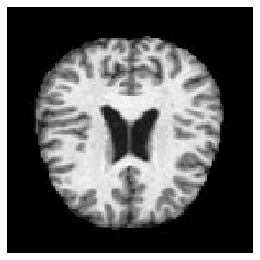

In [51]:

# Test Case 1: Non-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_105.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 23ms/step
60.88 % chances are there that the image is Very_Mild_Demented


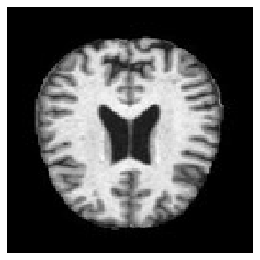

In [52]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Very_Mild_Demented/verymild_112.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 22ms/step
89.61 % chances are there that the image is Non_Demented


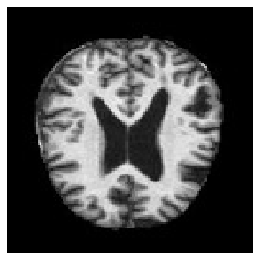

In [53]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_128.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 48ms/step
75.87 % chances are there that the image is Very_Mild_Demented


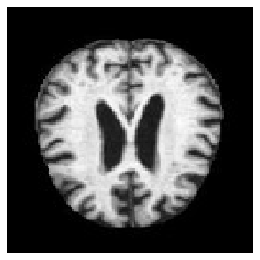

In [54]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Mild_Demented/mild_113.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 27ms/step
69.71 % chances are there that the image is Mild_Demented


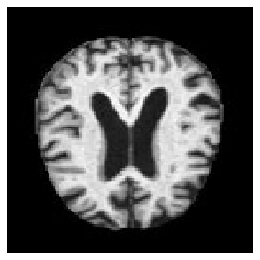

In [55]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Mild_Demented/mild.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])